In [14]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict

In [15]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')

    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')

In [7]:
data_dir = Path('data-network')
images_dir = Path('images')

In [8]:
twitter = 'https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p'
github = 'https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p'

In [9]:
datasets = [twitter, github]
data_paths = list()

for data in datasets:
    file_name = data.split('/')[-1].replace('?raw=true', '')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, data)
    data_paths.append(data_path)

Directory Created: data-network
File Created: ego-twitter.p
Directory Exists
File Created: github_users.p


In [11]:
T = nx.read_gpickle(data_paths[0])
Gh = nx.read_gpickle(data_paths[1])

In [12]:
print(len(T))
print(type(T.nodes()))
print(list(T.edges(data=True))[-1])
print(type(list(T.edges(data=True))[-1][2]))

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
<class 'dict'>


In [16]:
T_sub = nx.DiGraph()
edges_from_T = [x for x in T.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if
                x[1] < 50]
T_sub.add_edges_from(edges_from_T)

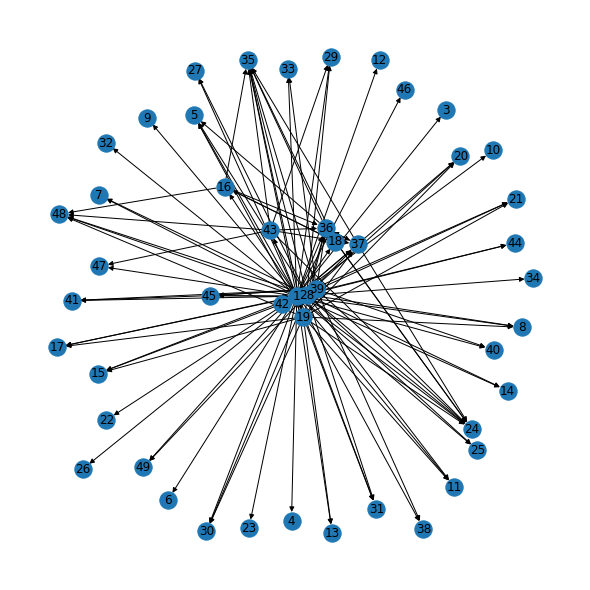

In [17]:
plt.figure(figsize=(8, 8))
nx.draw(T_sub, with_labels=True)
plt.show()

In [18]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'].year < 2010]

In [19]:
print(noi[:10])
print(eoi[:10])

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


In [20]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

In [21]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
# number_of_selfloops() is deprecated
assert len(list(nx.selfloop_edges(T))) == len(find_selfloop_nodes(T))

In [22]:
len(list(nx.selfloop_edges(T)))

42

In [27]:
data = [(13829, 1386, {'date': date(2012, 3, 13)}), (3086, 669, {'date': date(2009, 3, 1)}), (3086, 3100, {'date': date(2013, 8, 10)}), (3086, 3117, {'date': date(2007, 12, 20)}), (4111, 4133, {'date': date(2007, 10, 28)}), (4111, 12582, {'date': date(2013, 6, 1)}), (6163, 7331, {'date': date(2013, 2, 3)}), (6163, 7336, {'date': date(2007, 9, 12)}), (6163, 6168, {'date': date(2008, 4, 2)}), (6163, 1326, {'date': date(2009, 2, 16)}), (4636, 4666, {'date': date(2012, 3, 20)}), (543, 12123, {'date': date(2014, 8, 12)}), (36, 24, {'date': date(2009, 4, 23)}), (12836, 12856, {'date': date(2014, 2, 21)}), (10790, 10854, {'date': date(2009, 8, 11)}), (9262, 9338, {'date': date(2007, 11, 11)}), (4160, 4161, {'date': date(2012, 4, 14)}), (4160, 3681, {'date': date(2013, 8, 10)}), (7746, 3396, {'date': date(2007, 2, 23)}), (7746, 543, {'date': date(2011, 7, 14)}), (7746, 5073, {'date': date(2012, 2, 25)}), (7746, 1130, {'date': date(2013, 8, 4)}), (7746, 3265, {'date': date(2008, 11, 8)}), (19013, 21248, {'date': date(2009, 3, 21)}), (19013, 21253, {'date': date(2007, 8, 17)}), (14916, 14930, {'date': date(2012, 4, 10)}), (5717, 5752, {'date': date(2009, 2, 2)}), (3159, 3176, {'date': date(2011, 8, 15)}), (3159, 3177, {'date': date(2008, 2, 1)}), (3159, 3193, {'date': date(2014, 1, 2)}), (1627, 1648, {'date': date(2011, 11, 7)}), (19550, 19570, {'date': date(2009, 11, 13)}), (5215, 5217, {'date': date(2011, 1, 7)}), (4198, 16203, {'date': date(2014, 12, 1)}), (3177, 3159, {'date': date(2010, 6, 2)}), (3177, 3176, {'date': date(2014, 11, 10)}), (1134, 2406, {'date': date(2011, 7, 10)}), (1134, 543, {'date': date(2011, 10, 20)}), (4206, 21962, {'date': date(2014, 4, 17)}), (6770, 2671, {'date': date(2010, 5, 18)}), (11384, 4955, {'date': date(2007, 2, 12)}), (11384, 2406, {'date': date(2007, 10, 13)}), (11384, 11402, {'date': date(2009, 11, 27)}), (10877, 10917, {'date': date(2014, 7, 17)}), (10877, 7886, {'date': date(2009, 1, 4)}), (10877, 36, {'date': date(2008, 10, 25)}), (10877, 10936, {'date': date(2008, 12, 26)}), (10877, 1326, {'date': date(2012, 1, 19)}), (10373, 1386, {'date': date(2011, 4, 21)}), (10373, 2501, {'date': date(2012, 8, 13)}), (3213, 3214, {'date': date(2008, 4, 19)}), (3213, 3265, {'date': date(2007, 8, 8)}), (3213, 3266, {'date': date(2009, 1, 4)}), (5626, 16654, {'date': date(2011, 3, 5)}), (20122, 20177, {'date': date(2014, 12, 21)}), (667, 669, {'date': date(2014, 2, 3)}), (667, 747, {'date': date(2008, 2, 23)}), (161, 18159, {'date': date(2014, 9, 22)}), (7331, 6163, {'date': date(2012, 10, 15)}), (7331, 6168, {'date': date(2012, 3, 17)}), (7331, 7606, {'date': date(2008, 11, 7)}), (7331, 24, {'date': date(2009, 9, 21)}), (7331, 36, {'date': date(2010, 5, 26)}), (10917, 10877, {'date': date(2011, 9, 7)}), (10917, 24, {'date': date(2014, 10, 16)}), (10917, 7886, {'date': date(2011, 7, 13)}), (10917, 36, {'date': date(2013, 8, 8)}), (10917, 1326, {'date': date(2009, 5, 23)}), (22184, 22188, {'date': date(2012, 11, 3)}), (6318, 6301, {'date': date(2011, 4, 3)}), (8367, 8421, {'date': date(2012, 7, 10)}), (21167, 3931, {'date': date(2012, 7, 9)}), (3265, 4955, {'date': date(2012, 6, 6)}), (3265, 4811, {'date': date(2014, 9, 18)}), (3265, 3266, {'date': date(2008, 9, 24)}), (3266, 4811, {'date': date(2007, 2, 16)}), (3266, 1926, {'date': date(2008, 3, 16)}), (3266, 3265, {'date': date(2014, 5, 25)}), (4291, 4306, {'date': date(2014, 9, 9)}), (4291, 4310, {'date': date(2007, 9, 11)}), (4811, 4955, {'date': date(2007, 4, 19)}), (4811, 3265, {'date': date(2013, 8, 23)}), (4811, 3266, {'date': date(2008, 8, 25)}), (7886, 10877, {'date': date(2012, 9, 5)}), (7886, 10917, {'date': date(2008, 9, 19)}), (7886, 24, {'date': date(2014, 8, 17)}), (7886, 36, {'date': date(2012, 9, 21)}), (7886, 1326, {'date': date(2012, 3, 23)}), (6863, 14981, {'date': date(2012, 8, 7)}), (13012, 13017, {'date': date(2012, 3, 4)}), (16597, 24, {'date': date(2012, 5, 2)}), (16597, 36, {'date': date(2011, 4, 19)}), (16597, 16610, {'date': date(2011, 11, 11)}), (12507, 12523, {'date': date(2012, 3, 11)}), (16618, 16619, {'date': date(2013, 3, 3)}), (13036, 15161, {'date': date(2012, 4, 23)}), (3826, 669, {'date': date(2014, 11, 9)}), (3826, 3100, {'date': date(2009, 2, 24)}), (3826, 3860, {'date': date(2013, 7, 27)}), (3826, 3681, {'date': date(2013, 2, 14)}), (7410, 7437, {'date': date(2012, 5, 2)}), (15092, 2148, {'date': date(2014, 11, 11)}), (15092, 20816, {'date': date(2009, 4, 8)}), (2820, 2826, {'date': date(2011, 10, 1)}), (2820, 2871, {'date': date(2010, 3, 26)}), (2311, 2371, {'date': date(2008, 8, 26)}), (11020, 11042, {'date': date(2008, 5, 12)}), (13070, 13079, {'date': date(2009, 10, 15)}), (20755, 24, {'date': date(2010, 11, 26)}), (20755, 1326, {'date': date(2014, 5, 2)}), (20756, 669, {'date': date(2012, 9, 7)}), (20756, 3100, {'date': date(2013, 3, 17)}), (20756, 3681, {'date': date(2010, 12, 9)}), (14613, 14617, {'date': date(2009, 6, 2)}), (10004, 10030, {'date': date(2008, 3, 1)}), (10004, 10111, {'date': date(2011, 7, 15)}), (4892, 1130, {'date': date(2011, 12, 10)}), (4892, 4947, {'date': date(2012, 3, 6)}), (2871, 15372, {'date': date(2014, 4, 27)}), (6968, 669, {'date': date(2010, 2, 6)}), (6968, 1386, {'date': date(2012, 9, 20)}), (6968, 4133, {'date': date(2012, 9, 22)}), (3385, 3396, {'date': date(2008, 3, 4)}), (8001, 23190, {'date': date(2008, 6, 26)}), (19787, 13581, {'date': date(2012, 4, 3)}), (21325, 21371, {'date': date(2009, 8, 2)}), (16720, 16734, {'date': date(2007, 10, 26)}), (16720, 16739, {'date': date(2008, 10, 24)}), (12119, 24, {'date': date(2013, 6, 1)}), (12119, 36, {'date': date(2007, 5, 1)}), (22872, 22918, {'date': date(2014, 7, 15)}), (7519, 16041, {'date': date(2012, 7, 8)}), (12640, 18082, {'date': date(2007, 4, 20)}), (12640, 18086, {'date': date(2008, 7, 8)}), (5987, 4957, {'date': date(2010, 12, 4)}), (5987, 492, {'date': date(2009, 6, 25)}), (19316, 19344, {'date': date(2013, 3, 15)}), (19316, 2501, {'date': date(2011, 11, 15)}), (13690, 4955, {'date': date(2014, 4, 5)}), (12162, 15560, {'date': date(2011, 1, 4)}), (2443, 3564, {'date': date(2014, 1, 9)}), (401, 492, {'date': date(2010, 11, 25)}), (401, 502, {'date': date(2013, 6, 27)}), (9106, 9107, {'date': date(2012, 5, 4)}), (8598, 8616, {'date': date(2011, 2, 6)}), (21919, 4161, {'date': date(2007, 7, 18)}), (21919, 669, {'date': date(2011, 12, 12)}), (21919, 3100, {'date': date(2012, 10, 15)}), (21919, 3681, {'date': date(2011, 1, 14)}), (10143, 4306, {'date': date(2009, 5, 26)}), (4517, 6414, {'date': date(2008, 7, 15)}), (20906, 2406, {'date': date(2012, 9, 5)}), (20906, 492, {'date': date(2013, 8, 12)}), (6059, 20368, {'date': date(2008, 11, 20)}), (2501, 1386, {'date': date(2009, 5, 1)}), (2501, 10373, {'date': date(2012, 7, 15)}), (13257, 13286, {'date': date(2008, 11, 4)}), (1484, 1492, {'date': date(2008, 6, 5)}), (1484, 1499, {'date': date(2013, 8, 9)}), (1996, 6038, {'date': date(2012, 7, 28)}), (20947, 669, {'date': date(2011, 7, 19)}), (20947, 3100, {'date': date(2010, 11, 23)}), (20947, 3681, {'date': date(2008, 6, 20)}), (5590, 5601, {'date': date(2012, 8, 17)}), (5590, 5626, {'date': date(2013, 8, 18)}), (18917, 19012, {'date': date(2013, 12, 15)}), (18917, 19013, {'date': date(2014, 1, 17)}), (10730, 24, {'date': date(2010, 1, 21)}), (10730, 36, {'date': date(2014, 1, 11)}), (10730, 1326, {'date': date(2008, 11, 4)}), (23024, 669, {'date': date(2010, 6, 15)}), (23024, 3100, {'date': date(2012, 6, 1)}), (23024, 23091, {'date': date(2011, 5, 20)}), (5109, 5112, {'date': date(2007, 5, 10)}), (13306, 13334, {'date': date(2014, 5, 18)})]

In [28]:
attr = {13829: {'category': 'D', 'occupation': 'celebrity'}, 15372: {'category': 'D', 'occupation': 'celebrity'}, 3086: {'category': 'P', 'occupation': 'scientist'}, 4111: {'category': 'D', 'occupation': 'scientist'}, 6163: {'category': 'P', 'occupation': 'scientist'}, 13334: {'category': 'P', 'occupation': 'scientist'}, 6168: {'category': 'P', 'occupation': 'celebrity'}, 24: {'category': 'P', 'occupation': 'politician'}, 3100: {'category': 'D', 'occupation': 'scientist'}, 4636: {'category': 'D', 'occupation': 'celebrity'}, 543: {'category': 'D', 'occupation': 'politician'}, 36: {'category': 'D', 'occupation': 'scientist'}, 12836: {'category': 'I', 'occupation': 'celebrity'}, 4133: {'category': 'D', 'occupation': 'scientist'}, 10790: {'category': 'D', 'occupation': 'scientist'}, 3117: {'category': 'P', 'occupation': 'politician'}, 9262: {'category': 'I', 'occupation': 'scientist'}, 23091: {'category': 'P', 'occupation': 'celebrity'}, 12856: {'category': 'D', 'occupation': 'politician'}, 4666: {'category': 'P', 'occupation': 'politician'}, 4160: {'category': 'P', 'occupation': 'politician'}, 4161: {'category': 'I', 'occupation': 'politician'}, 7746: {'category': 'P', 'occupation': 'scientist'}, 19012: {'category': 'D', 'occupation': 'politician'}, 19013: {'category': 'I', 'occupation': 'politician'}, 14916: {'category': 'I', 'occupation': 'politician'}, 14930: {'category': 'P', 'occupation': 'celebrity'}, 5717: {'category': 'P', 'occupation': 'politician'}, 3159: {'category': 'I', 'occupation': 'scientist'}, 1627: {'category': 'I', 'occupation': 'scientist'}, 19550: {'category': 'D', 'occupation': 'politician'}, 5215: {'category': 'P', 'occupation': 'politician'}, 5217: {'category': 'D', 'occupation': 'scientist'}, 3681: {'category': 'I', 'occupation': 'politician'}, 2148: {'category': 'D', 'occupation': 'politician'}, 4198: {'category': 'D', 'occupation': 'celebrity'}, 10854: {'category': 'D', 'occupation': 'politician'}, 3176: {'category': 'D', 'occupation': 'scientist'}, 3177: {'category': 'I', 'occupation': 'scientist'}, 1130: {'category': 'I', 'occupation': 'celebrity'}, 1134: {'category': 'P', 'occupation': 'scientist'}, 4206: {'category': 'I', 'occupation': 'scientist'}, 2671: {'category': 'P', 'occupation': 'scientist'}, 1648: {'category': 'P', 'occupation': 'politician'}, 19570: {'category': 'P', 'occupation': 'scientist'}, 6770: {'category': 'D', 'occupation': 'celebrity'}, 5752: {'category': 'D', 'occupation': 'scientist'}, 11384: {'category': 'D', 'occupation': 'politician'}, 3193: {'category': 'P', 'occupation': 'politician'}, 9338: {'category': 'I', 'occupation': 'politician'}, 10877: {'category': 'P', 'occupation': 'celebrity'}, 10373: {'category': 'I', 'occupation': 'politician'}, 14981: {'category': 'P', 'occupation': 'celebrity'}, 11402: {'category': 'I', 'occupation': 'politician'}, 3213: {'category': 'D', 'occupation': 'politician'}, 3214: {'category': 'P', 'occupation': 'celebrity'}, 5626: {'category': 'P', 'occupation': 'politician'}, 23190: {'category': 'P', 'occupation': 'celebrity'}, 20122: {'category': 'D', 'occupation': 'politician'}, 667: {'category': 'P', 'occupation': 'politician'}, 6301: {'category': 'I', 'occupation': 'scientist'}, 669: {'category': 'I', 'occupation': 'celebrity'}, 161: {'category': 'D', 'occupation': 'politician'}, 18082: {'category': 'I', 'occupation': 'celebrity'}, 7331: {'category': 'I', 'occupation': 'celebrity'}, 10917: {'category': 'P', 'occupation': 'scientist'}, 18086: {'category': 'D', 'occupation': 'scientist'}, 22184: {'category': 'P', 'occupation': 'scientist'}, 7336: {'category': 'D', 'occupation': 'scientist'}, 16041: {'category': 'P', 'occupation': 'scientist'}, 22188: {'category': 'I', 'occupation': 'scientist'}, 6318: {'category': 'P', 'occupation': 'politician'}, 8367: {'category': 'I', 'occupation': 'politician'}, 21167: {'category': 'D', 'occupation': 'celebrity'}, 10936: {'category': 'P', 'occupation': 'scientist'}, 3265: {'category': 'I', 'occupation': 'celebrity'}, 3266: {'category': 'P', 'occupation': 'politician'}, 4291: {'category': 'P', 'occupation': 'politician'}, 15560: {'category': 'P', 'occupation': 'celebrity'}, 4811: {'category': 'P', 'occupation': 'politician'}, 7886: {'category': 'P', 'occupation': 'politician'}, 6863: {'category': 'I', 'occupation': 'scientist'}, 20177: {'category': 'P', 'occupation': 'scientist'}, 4306: {'category': 'P', 'occupation': 'scientist'}, 13012: {'category': 'D', 'occupation': 'celebrity'}, 16597: {'category': 'P', 'occupation': 'celebrity'}, 4310: {'category': 'D', 'occupation': 'scientist'}, 13017: {'category': 'I', 'occupation': 'politician'}, 12507: {'category': 'I', 'occupation': 'politician'}, 16610: {'category': 'I', 'occupation': 'celebrity'}, 8421: {'category': 'I', 'occupation': 'politician'}, 16618: {'category': 'D', 'occupation': 'politician'}, 16619: {'category': 'I', 'occupation': 'celebrity'}, 13036: {'category': 'D', 'occupation': 'politician'}, 12523: {'category': 'P', 'occupation': 'politician'}, 747: {'category': 'D', 'occupation': 'politician'}, 18159: {'category': 'P', 'occupation': 'celebrity'}, 3826: {'category': 'P', 'occupation': 'politician'}, 7410: {'category': 'D', 'occupation': 'scientist'}, 15092: {'category': 'I', 'occupation': 'scientist'}, 21248: {'category': 'I', 'occupation': 'politician'}, 2820: {'category': 'I', 'occupation': 'celebrity'}, 21253: {'category': 'P', 'occupation': 'celebrity'}, 2311: {'category': 'I', 'occupation': 'politician'}, 2826: {'category': 'D', 'occupation': 'celebrity'}, 11020: {'category': 'D', 'occupation': 'politician'}, 7437: {'category': 'P', 'occupation': 'celebrity'}, 16654: {'category': 'I', 'occupation': 'scientist'}, 6414: {'category': 'D', 'occupation': 'scientist'}, 13070: {'category': 'I', 'occupation': 'politician'}, 13581: {'category': 'D', 'occupation': 'politician'}, 20755: {'category': 'D', 'occupation': 'celebrity'}, 20756: {'category': 'I', 'occupation': 'scientist'}, 14613: {'category': 'I', 'occupation': 'celebrity'}, 10004: {'category': 'I', 'occupation': 'politician'}, 3860: {'category': 'D', 'occupation': 'celebrity'}, 13079: {'category': 'D', 'occupation': 'celebrity'}, 14617: {'category': 'P', 'occupation': 'celebrity'}, 4892: {'category': 'P', 'occupation': 'celebrity'}, 11042: {'category': 'I', 'occupation': 'celebrity'}, 12582: {'category': 'P', 'occupation': 'politician'}, 1326: {'category': 'D', 'occupation': 'scientist'}, 10030: {'category': 'I', 'occupation': 'celebrity'}, 2871: {'category': 'P', 'occupation': 'scientist'}, 6968: {'category': 'P', 'occupation': 'celebrity'}, 3385: {'category': 'D', 'occupation': 'scientist'}, 15161: {'category': 'D', 'occupation': 'scientist'}, 8001: {'category': 'P', 'occupation': 'celebrity'}, 2371: {'category': 'D', 'occupation': 'scientist'}, 3396: {'category': 'P', 'occupation': 'scientist'}, 16203: {'category': 'D', 'occupation': 'politician'}, 19787: {'category': 'D', 'occupation': 'politician'}, 21325: {'category': 'P', 'occupation': 'scientist'}, 20816: {'category': 'I', 'occupation': 'scientist'}, 16720: {'category': 'I', 'occupation': 'scientist'}, 4947: {'category': 'I', 'occupation': 'celebrity'}, 12119: {'category': 'D', 'occupation': 'politician'}, 22872: {'category': 'I', 'occupation': 'politician'}, 12123: {'category': 'D', 'occupation': 'celebrity'}, 4955: {'category': 'P', 'occupation': 'celebrity'}, 4957: {'category': 'D', 'occupation': 'celebrity'}, 16734: {'category': 'D', 'occupation': 'politician'}, 7519: {'category': 'I', 'occupation': 'politician'}, 12640: {'category': 'P', 'occupation': 'celebrity'}, 3931: {'category': 'I', 'occupation': 'celebrity'}, 5987: {'category': 'D', 'occupation': 'scientist'}, 16739: {'category': 'I', 'occupation': 'celebrity'}, 2406: {'category': 'I', 'occupation': 'scientist'}, 1386: {'category': 'I', 'occupation': 'politician'}, 19316: {'category': 'I', 'occupation': 'politician'}, 13690: {'category': 'I', 'occupation': 'celebrity'}, 21371: {'category': 'P', 'occupation': 'scientist'}, 10111: {'category': 'I', 'occupation': 'celebrity'}, 12162: {'category': 'I', 'occupation': 'celebrity'}, 22918: {'category': 'I', 'occupation': 'celebrity'}, 1926: {'category': 'D', 'occupation': 'celebrity'}, 2443: {'category': 'I', 'occupation': 'scientist'}, 20368: {'category': 'I', 'occupation': 'politician'}, 19344: {'category': 'D', 'occupation': 'politician'}, 401: {'category': 'P', 'occupation': 'celebrity'}, 9106: {'category': 'P', 'occupation': 'scientist'}, 9107: {'category': 'D', 'occupation': 'celebrity'}, 6038: {'category': 'I', 'occupation': 'celebrity'}, 8598: {'category': 'P', 'occupation': 'politician'}, 21919: {'category': 'I', 'occupation': 'celebrity'}, 10143: {'category': 'P', 'occupation': 'celebrity'}, 4517: {'category': 'D', 'occupation': 'celebrity'}, 8616: {'category': 'D', 'occupation': 'celebrity'}, 20906: {'category': 'D', 'occupation': 'celebrity'}, 6059: {'category': 'D', 'occupation': 'scientist'}, 7606: {'category': 'P', 'occupation': 'scientist'}, 2501: {'category': 'P', 'occupation': 'scientist'}, 13257: {'category': 'D', 'occupation': 'celebrity'}, 21962: {'category': 'D', 'occupation': 'politician'}, 1484: {'category': 'I', 'occupation': 'politician'}, 1996: {'category': 'D', 'occupation': 'celebrity'}, 5073: {'category': 'P', 'occupation': 'celebrity'}, 20947: {'category': 'I', 'occupation': 'celebrity'}, 1492: {'category': 'D', 'occupation': 'celebrity'}, 5590: {'category': 'I', 'occupation': 'politician'}, 1499: {'category': 'P', 'occupation': 'celebrity'}, 5601: {'category': 'P', 'occupation': 'scientist'}, 18917: {'category': 'D', 'occupation': 'celebrity'}, 13286: {'category': 'I', 'occupation': 'scientist'}, 10730: {'category': 'D', 'occupation': 'celebrity'}, 492: {'category': 'I', 'occupation': 'politician'}, 3564: {'category': 'P', 'occupation': 'scientist'}, 23024: {'category': 'P', 'occupation': 'politician'}, 5109: {'category': 'I', 'occupation': 'politician'}, 502: {'category': 'P', 'occupation': 'scientist'}, 5112: {'category': 'I', 'occupation': 'celebrity'}, 13306: {'category': 'D', 'occupation': 'scientist'}}

In [29]:
t_131 = nx.DiGraph()
t_131.add_nodes_from(attr)
t_131.add_edges_from(data)
nx.set_node_attributes(t_131, attr)